# Classifier metrics -- how well did we do?

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
target = pd.Series(data.target, name='Target')
features = pd.DataFrame(data.data, columns=data.feature_names)
features.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# Do our train-test split:

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target)

# Fit the model

In [3]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(solver='liblinear', C=1000)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

# Test the model *on the test data* (we don't care much if it does well on the *training data*)

In [4]:
y_pred = logreg.predict(X_test)

# Accuracy 

total # correct / total #

In [5]:
(y_pred == y_test).mean()

0.965034965034965

In [6]:
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.965034965034965

# Other classification metrics

<img src="data/img/Precisionrecall.svg">

In [7]:
metrics.precision_score(y_test, y_pred)

0.9662921348314607

So 94% of what we said was malignant was actually malignant (but 6% of women went through unnecessary surgery)

In [8]:
metrics.recall_score(y_test, y_pred)

0.9772727272727273

So we caught 99% of the actual malignant tumors (but 1.2% of women we 'cleared' went on to develop malignant cancer)

# ROC 

"Receiver operating characteristic" -- used to measure radar operator performance

- True postive versus false positive

Text(0, 0.5, 'True Positive Rate')

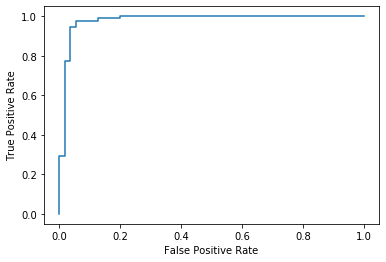

In [9]:
y_pred_prob = logreg.predict_proba(X_test)
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_prob[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')


# ROC-AUC - the 'area under the curve'

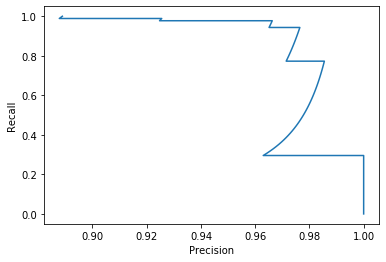

In [13]:
prec, rec, _ = metrics.precision_recall_curve(y_test, y_pred_prob[:,1])
plt.plot(prec, rec)
plt.xlabel('Precision')
plt.ylabel('Recall');



In [10]:
metrics.roc_auc_score(y_test, y_pred_prob[:,1])

0.9795454545454546

# F1 Score

2 * (precision * recall) / (precision + recall)

Best possible value is 1

In [14]:
metrics.f1_score(y_test, y_pred)

0.9717514124293786

# Confusion matrix / cross-tabulation / classification report

Sometimes it's nice to know exactly _where_ our classifier failed, particularly when doing multi-label classification:

In [16]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

iris = datasets.load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
y_pred = tree.predict(X_test)
pd.crosstab(y_test, y_pred, rownames=['y_test'], colnames=['y_pred'])


y_pred,0,1,2
y_test,,,
0,13,0,0
1,0,15,1
2,0,0,9


In [18]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [19]:
metrics.confusion_matrix(y_test, y_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

In [20]:
print(metrics.classification_report(y_test, y_pred, target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38

